Previously, we built a simple search engine with a reverse index. However, our index turned out to be ridiculously huge! In this page, we will identify ways to optimize our index to only contain what we need to attain a good search.

## 🗄️ Not Everything Needs to be Indexed

In a textbook, indexes are small, maybe a few pages, or 50 pages at the most. If the editors attempted to index every single term in a book, and every single location that term can be found, the index would likely be larger than the textbook itself. Obviously, this isn't practical.

Instead, authors and editors can use their discretion to choose which terms and words are important enough to decide to index, and if a page is important enough to add to the index.

When building a search engine, how can we choose the terms which matter and ignore those which don't? The search engine does not normally have access to the author or editors to build an index of a page. It has to figure out a way for itself.

## ⚖️ Not all Words are Equal

Not every word carries the same weight in a sentence or a phrase. Some words provide rich context, while others add little or no value. If we examine the inverse index from our naïve approach, we notice a lot of junk words and stop words, common words that don’t help in finding relevant information.

Take a look at this sentence:

```
'Moreover, in most languages such as English, we use lots of words which add little meaning.'
```

Now, think about the actual value of the following words:

```
🚫 'Moreover', 'in', 'most', 'such', 'as', 'we', 'use', 'lots', 'of', 'which'
✅ 'languages', 'English', 'words', 'add', 'little', 'meaning'
```

These words don’t significantly change the meaning much. They act as glue but don’t carry much weight when searching for key concepts.

## 🤔 Word Frequency and Stopwords

Common words, often called stopwords, appear frequently but don’t significantly change the meaning of a sentence. In contrast, less common words carry more weight because they help differentiate between topics.

🧩 Example: If you search for *'energy crisis'*, the words 'energy' and 'crisis' are far more useful than 'the', 'in', or 'of', which appear in almost every document.

⁉️ So, how do we quantify which words are important and which ones can be ignored?

## 📊 Term-Frequency Map (TF)

A dirt simple approach is to simply count the word occurrences throughout our corpus. By building a **histogram** of **terms**, we can analyze and see which words appear frequently, and which words appear rarely.

Once we have these counts, we can:
* ✅ Ignore extremely common words (like 'the', 'in', 'of').
* ✅ Prioritize rare but meaningful words (like 'mitochondria', 'photosynthesis').

Let's build! To build a term-frequency map, we simply 

```javascript
const termFrequencyMap = new Map();

for (const article of corpus) {
  const { text, title } = article;
  const tokens = tokenize(normalize(text));

  // Add or increment the count of each token in the histogram map
  for (const token of tokens) {
    termFrequencyMap.set(token, (termFrequencyMap.get(token) || 0) + 1);
  }
}
```

In [3]:
#% hidden
!! node .aesop-fables-runner.js

[]

## 🧐 Zipf's Law

> <?xml version='1.0' encoding='utf-8'?>
> <svg baseProfile='tiny' height='480' version='1.2' width='480' xmlns='http://www.w3.org/2000/svg'
>   xmlns:ev='http://www.w3.org/2001/xml-events' xmlns:xlink='http://www.w3.org/1999/xlink'>
>   <defs />
>   <text fill='black' font-size='50' text-anchor='middle' x='60' y='60'>the</text>
>   <text fill='black' font-size='45' text-anchor='middle' x='180' y='60'>be</text>
>   <text fill='black' font-size='37' text-anchor='middle' x='300' y='60'>to</text>
>   <text fill='black' font-size='31' text-anchor='middle' x='420' y='60'>of</text>
>   <text fill='black' font-size='28' text-anchor='middle' x='60' y='180'>and</text>
>   <text fill='black' font-size='25' text-anchor='middle' x='180' y='180'>a</text>
>   <text fill='black' font-size='16' text-anchor='middle' x='300' y='180'>in</text>
>   <text fill='black' font-size='16' text-anchor='middle' x='420' y='180'>that</text>
>   <text fill='black' font-size='9' text-anchor='middle' x='60' y='300'>have</text>
>   <text fill='black' font-size='9' text-anchor='middle' x='180' y='300'>I</text>
>   <text fill='black' font-size='8' text-anchor='middle' x='300' y='300'>it</text>
>   <text fill='black' font-size='8' text-anchor='middle' x='420' y='300'>for</text>
>   <text fill='black' font-size='8' text-anchor='middle' x='60' y='420'>not</text>
>   <text fill='black' font-size='8' text-anchor='middle' x='180' y='420'>on</text>
>   <text fill='black' font-size='4' text-anchor='middle' x='300' y='420'>with</text>
>   <text fill='black' font-size='4' text-anchor='middle' x='420' y='420'>he</text>
> </svg>

Zipf's law
: 'an empirical law stating that when a list of measured values is sorted in decreasing order, the value of the n-th entry is often approximately inversely proportional to n.' [(Wikipedia:zipf's law)][zipf-wikipeda]

Zipf’s law states that the frequency of a word is inversely proportional to its rank , mathematically expressed as:

$$f(r) = \frac{C}{r^s}$$

where:
* $s$ is a characteristic exponent, normally close to $1$ for natural language
* $r$ is the rank of a term. Given an array of terms in a corpus, sorted by their frequency of occurence, the rank is the index of a term
* $C$ is a constant which is used to normalize the probabilities to $1$. We will use $C=1$ in this article.

Since $s$ is normally very close to $1$, we can approximate it as:

$$f(r)\propto\frac{1}{\text{r}}=\frac{C}{\text{r}}$$ 

### 🕵️ Vocabulary Analysis in Æsop's Fables

[zipf-wikipeda]: 'https://en.wikipedia.org/wiki/Zipf%27s_law'

For the analysis and visualizations below, I used Python along with a few libraries:

* NumPy for numerical computations
* SciPy for statistical analysis
* Matplotlib for visualization.

Note that the code used to generate these plots is hidden using a magic command of this website. The code is available in the last page (errata) as well as linked in the [sources section](#sources)

$k$ terms are randomly sampled so matplotlib does not choke on the data.

Analysis steps:

1. Preprocess & Tokenize text. I used node.js with the same preprocessing code as used elsewhere in this article
2. Graph data
    * Terms were sorted by their frequency, high to low
    * $k$ terms were randomly sampled from the corpus, $k=2000$ for this visualization
    * Scipy was used to perform linear regression on the $\log(\text{rank}):\log(\text{frequencies})$
    * Results were graphed using matplotlib

## 📈 Visualization

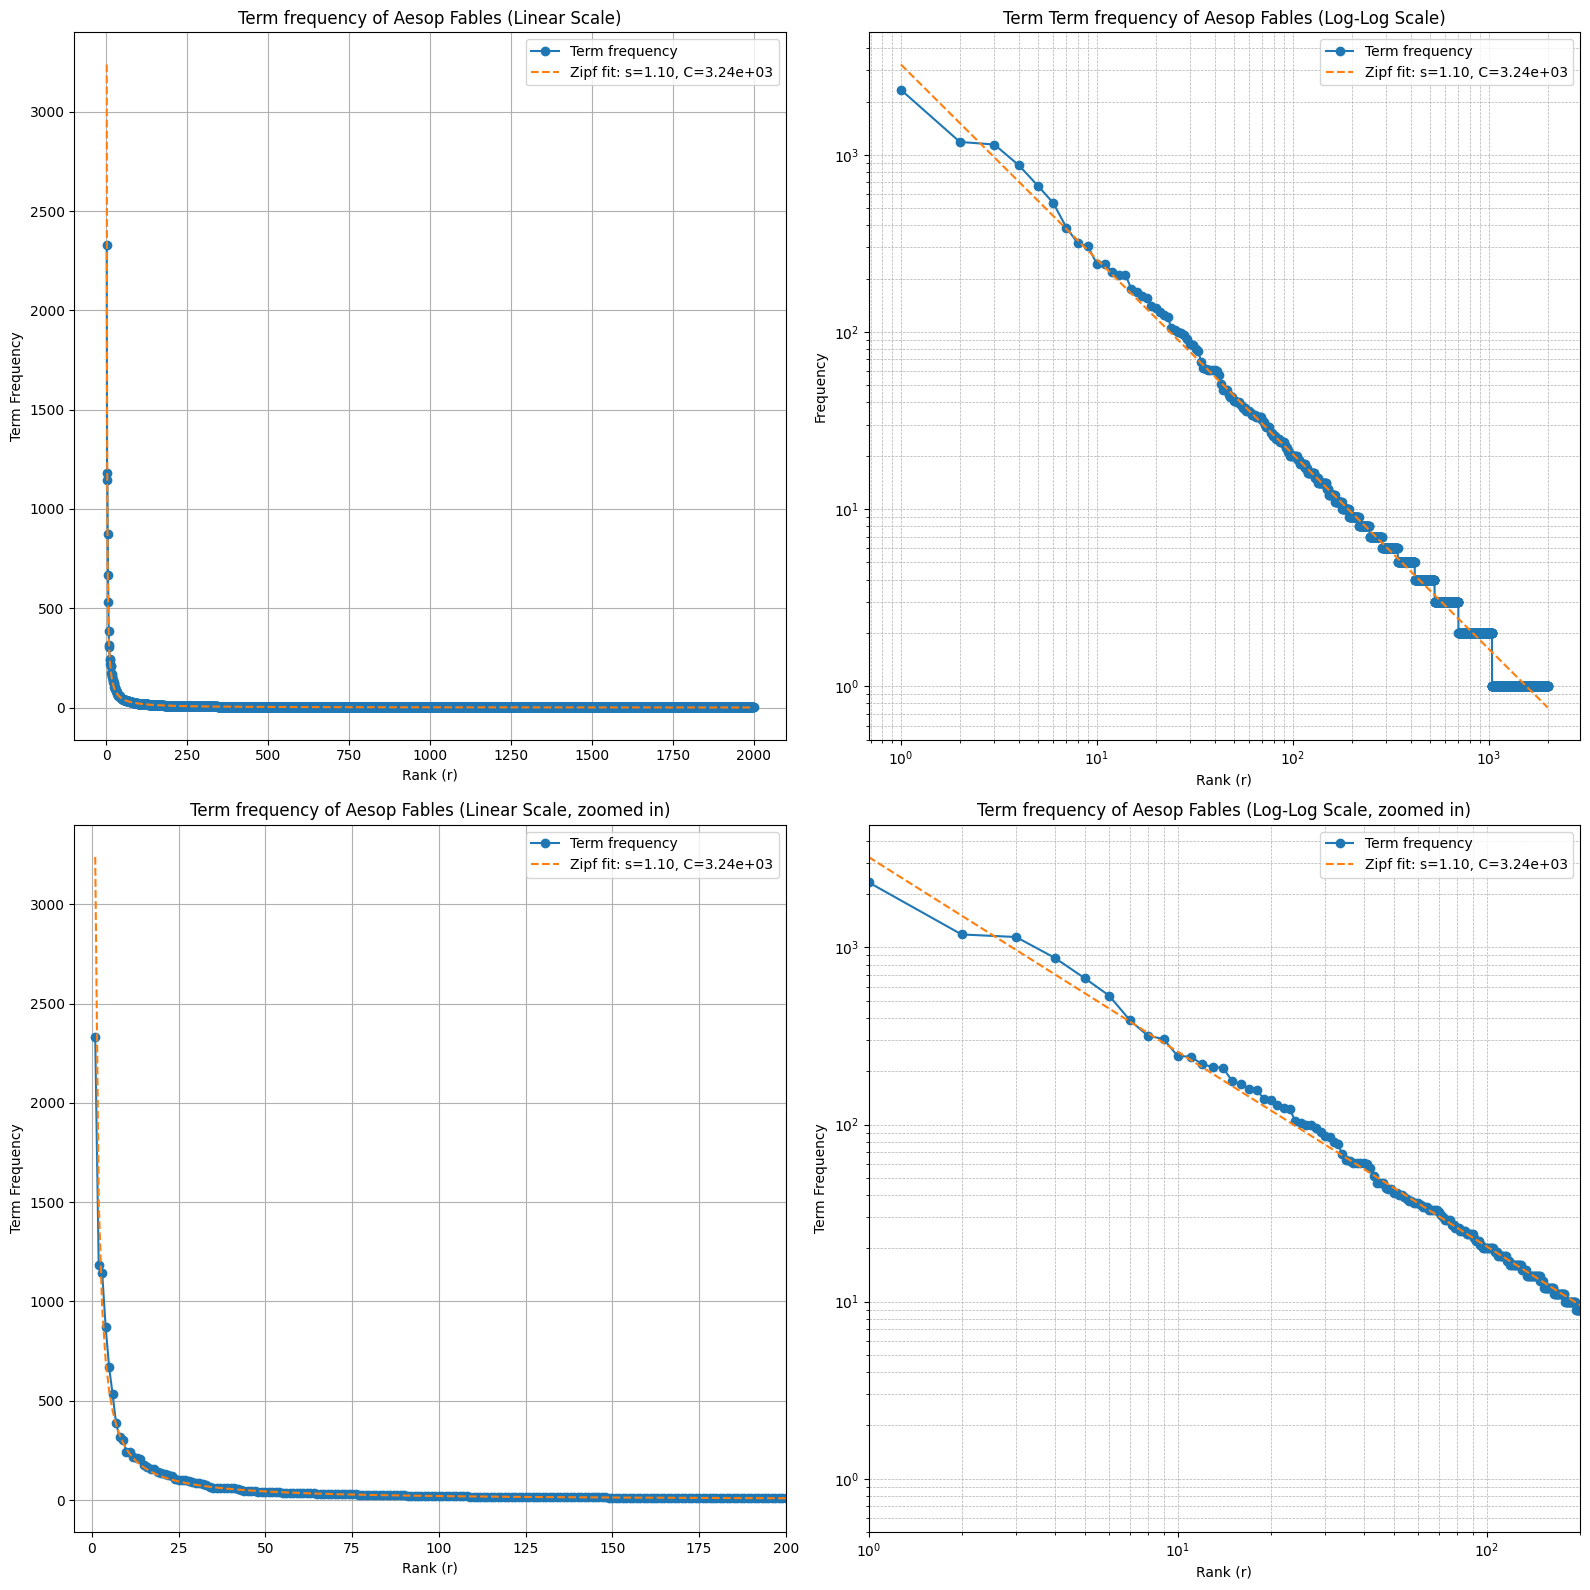

Fitted Zipf parameters: s = 1.100, C = 3.238e+03
R-squared: 0.9778, p-value: 0, std-err: 0.003708
minimum frequency filter: n=1; sample count: k=2000


In [55]:
#% hidecode

import matplotlib.pyplot as plt
import json
import random
import numpy as np
from scipy.stats import linregress

wordBank = {}

with open('.aesop-fables-analysis.json') as f:
    fables = json.load(f)
    for fable in fables:
        for term in fable['text'].split(' '):
            term = term.strip()
            if not term:
                continue
            wordBank[term] = wordBank.get(term, 0) + 1

# n is the minimum frequency of a term before it's thrown out; k is the number of samples to pick
n, k = 1, 2000

sorted_terms = sorted([(term, count) for term, count in wordBank.items() if count >= n], key=lambda x: x[1], reverse=True)
sampled_terms = random.sample(sorted_terms, min(k, len(sorted_terms)))
sampled_terms.sort(key=lambda x: x[1], reverse=True)

_, frequencies = zip(*sampled_terms)
frequencies = np.array(frequencies)
highFrequencies = frequencies[:len(frequencies) // 2]

ranks = np.arange(1, len(frequencies) + 1) # Ranks starting at 1 for proper log

# Perform Zipfian regression using scipy (linear regression on log ranks:log frequencies)
log_ranks, log_freqs = np.log(ranks), np.log(frequencies)
slope, intercept, r_value, p_value, std_err = linregress(log_ranks, log_freqs)

# We define s = -slope to match the usual Zipf form (f = C * r^-s)
s, C = -slope, np.exp(intercept)

# Compute the fitted Zipf curve
zipf_fit = C / (ranks ** s)

# Create figure with two subplots
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

# Linear scale plot
axs[0][0].plot(ranks, frequencies, marker='o', linestyle='-', label='Term frequency')
axs[0][0].plot(ranks, zipf_fit, '--', label=f'Zipf fit: s={s:.2f}, C={C:.2e}')
axs[0][0].set_xlabel('Rank (r)')
axs[0][0].set_ylabel('Term Frequency')
axs[0][0].set_title('Term frequency of Aesop Fables (Linear Scale)')
axs[0][0].grid(True)
axs[0][0].legend()

# Log-log scale plot
axs[0][1].plot(ranks, frequencies, marker='o', linestyle='-', label='Term frequency')
axs[0][1].plot(ranks, zipf_fit, '--', label=f'Zipf fit: s={s:.2f}, C={C:.2e}')
axs[0][1].set_xlabel('Rank (r)')
axs[0][1].set_ylabel('Frequency')
axs[0][1].set_title('Term Term frequency of Aesop Fables (Log-Log Scale)')
axs[0][1].set_xscale('log')
axs[0][1].set_yscale('log')
axs[0][1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[0][1].legend()

# Linear scale plot
axs[1][0].plot(ranks, frequencies, marker='o', linestyle='-', label='Term frequency')
axs[1][0].plot(ranks, zipf_fit, '--', label=f'Zipf fit: s={s:.2f}, C={C:.2e}')
axs[1][0].set_xlabel('Rank (r)')
axs[1][0].set_ylabel('Term Frequency')
axs[1][0].set_title('Term frequency of Aesop Fables (Linear Scale, zoomed in)')
axs[1][0].grid(True)
axs[1][0].legend()
axs[1][0].set_xlim([-5, len(ranks) // 10]) 

# Log-log scale plot
axs[1][1].plot(ranks, frequencies, marker='o', linestyle='-', label='Term frequency')
axs[1][1].plot(ranks, zipf_fit, '--', label=f'Zipf fit: s={s:.2f}, C={C:.2e}')
axs[1][1].set_xlabel('Rank (r)')
axs[1][1].set_ylabel('Term Frequency')
axs[1][1].set_title('Term frequency of Aesop Fables (Log-Log Scale, zoomed in)')
axs[1][1].set_xscale('log')
axs[1][1].set_yscale('log')
axs[1][1].grid(True, which='both', linestyle='--', linewidth=0.5)
axs[1][1].legend()
axs[1][1].set_xlim([1, len(ranks) // 10]) 

plt.tight_layout()
plt.show()

print(f'Fitted Zipf parameters: s = {s:.3f}, C = {C:.3e}')
print(f'R-squared: {r_value**2:.4f}, p-value: {p_value:.4g}, std-err: {std_err:.4g}')
print(f'minimum frequency filter: n={n}; sample count: k={k}')

## 🕵️ Is the Vocabulary of Aesop Fables Zipfian?

Looking at the results from the regression above,

* There is a high goodness of fit, $R^2\approx 1.0$

    $R^2=0.9778$ means that approximately $97.78\%$ of the variability in the $\log{(\text{term-frequency})}$ is explained by $\log{(\text{rank})}$. This high value indicates that the relationship is almost perfectly linear in the $\log-\log$ space, which is exactly what we expect from Zipf's law (i.e., a power-law distribution).
  <br />
* There is statistically significant relationship ($p\text{-value}\approx 0$)

    The $p\text{-value}=0$ indicates that the probability of observing the linear relationship by random chance is negligible. It shows the relationship is statistically signficant, confirming that the Zipfian model (power-law distribution) is appropriate for the data.
  <br />
* Additionally, note how our regression results show $s\approx 1$? Turns out this matches most natural language datasets!
* **‼️ Note:** the stairstepping at the end of the data is due to term frequency being discrete.
* **‼️ Note:** the numbers may slightly differ if this regression is re-run due to the random sampling.

## 🔩 Can we use this to Improve our Search?

Zipf’s law tells us that a small number of words appear very frequently, while most words are rare. But how can we use this insight to optimize search?

1. Applying Zipf’s Law to Index Reduction

    If a few words dominate the corpus, we can shrink our index by ignoring:
    * High-frequency stopwords (e.g., “the”, “is”, “and”).
    * Ultra-rare words that appear only once and contribute little to retrieval.

2. Improving Search Efficiency

    A naive search engine treats all words equally, but Zipf’s law suggests this is inefficient. Instead of indexing everything, we can prioritize rare but informative terms (e.g., 'quantum' vs. 'the') and compress our index by removing overly common words.

Let's apply Zipf's law to shrink our index while minimizing any impacts to our search by building a heuristic to reduce the size of our index significantly:

### 🤔 Heuristic

1. We can count the number of occurrences of each term to get a histogram of term frequencies
    * $\text{term} \to f_\text{term}$: hashmap of the term frequency
2. We can denoise our data by removing terms which are only seen $N_\min$ times
3. We can remove the $(\alpha N_\text{corpus})$ highest frequency terms (stop words)
4. We can remove the $(\beta N_\text{corpus})$ lowest frequency terms (noise and garbage)

## 🤨 Let's try it!

### 🥽 Experimentation

* Try to modify `ALPHA`, `BETA` and `MIN_FREQUENCY` and see how it affects the indexing
* Try to add a `MAX_FREQUENCY` constant and see how it affects indexing
* Try to figure out why there are no search results for *fox* when `ALPHA` is set to $0.05$?

## 📓 Sources

* Wikipedia: [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law)
* Experiments:
    * [Aesop fables preprocessor](https://github.com/yash101/Website/blob/master/notebooks/for-dummies/search-engine/.aesop-fables-runner.js)
    * [Python code within this article's source, hidden on this website](https://github.com/yash101/Website/blob/master/notebooks/for-dummies/search-engine/search-engine-6.ipynb)
* ChatGPT
    * Used for some help with proofreading and general article improvements

## ⏭️ Next Page

The next page is under construction.